## Usage of one explainer

Take EFM and Exp_EFM as an example, and use dataset amazon_toy.

In [7]:
from cornac.datasets import ratebeer
from cornac.data.reader import Reader
from cornac.eval_methods import RatioSplit
from cornac.data.sentiment import SentimentModality
from cornac.models import EFM
from cornac.explainer import Exp_EFM
from importlib import resources

fpath_rating = resources.files("cornac.datasets").joinpath("RateBeer/ratebeer_ratings.txt")
fpath_sentiment = resources.files("cornac.datasets").joinpath("RateBeer/ratebeer_lexicon.txt")

# Load the Amazon toy dataset
rating = ratebeer.load_feedback(fpath=fpath_rating,fmt="UIR", reader=Reader(min_user_freq=20))
sentiment_data = ratebeer.load_sentiment(fpath=fpath_sentiment,reader=Reader(min_user_freq=20))
md = SentimentModality(data=sentiment_data)

eval_method = RatioSplit(data=rating, test_size=0, sentiment=md)

# Instantiate the EFM model
efm = EFM(max_iter=20)
efm.fit(eval_method.train_set)

# Instantiate the explainer
explainer = Exp_EFM(rec_model=efm, dataset=eval_method.train_set)


/Users/yuky/Desktop/ROSE/cornac/data/dataset.py:335: UserWarning: 66507 duplicated observations are removed!
  warnings.warn("%d duplicated observations are removed!" % dup_count)


### Explain recommendations

In [8]:
# first, we need some recommendations
some_users = eval_method.test_set.user_ids[:3]
recomendations = efm.recommend_to_multiple_users(some_users, k=5)
print(recomendations)

     user_id item_id  prediction
0   Ungstrup  145524   10.719967
1   Ungstrup  155587   10.699045
2   Ungstrup  104527   10.011934
3   Ungstrup  150443    9.844995
4   Ungstrup  149620    9.842093
5   railcat1  155587   12.442008
6   railcat1  145524   12.422730
7   railcat1  109503   11.860083
8   railcat1  162711   11.653749
9   railcat1   94919   11.596722
10   Butters  155587   10.957694
11   Butters  145524   10.713104
12   Butters    9320   10.518152
13   Butters   18124   10.299882
14   Butters  150443   10.155306


In [9]:
# now, we can explain the recommendations
explainer.explain_recommendations(recomendations)

Computing explanations: 100%|██████████| 15/15 [00:00<00:00, 21.42it/s]


,user_id,item_id,prediction,explanations
0,Ungstrup,145524,10.719967,"{'sprawlers': 8.232754, 'peewater': 7.7269483,..."
1,Ungstrup,155587,10.699045,"{'sprawlers': 8.3330555, 'peewater': 8.8262615..."
2,Ungstrup,104527,10.011934,"{'sprawlers': 7.5451374, 'peewater': 8.011711,..."
3,Ungstrup,150443,9.844995,"{'sprawlers': 7.917705, 'peewater': 7.823717, ..."
4,Ungstrup,149620,9.842093,"{'sprawlers': 8.350597, 'peewater': 7.5099983,..."
5,railcat1,155587,12.442008,"{'yummie': 10.32288, 'gostoso': 9.480017, 'tai..."
6,railcat1,145524,12.422730,"{'yummie': 7.951337, 'gostoso': 8.787275, 'tai..."
7,railcat1,109503,11.860083,"{'yummie': 8.3054905, 'gostoso': 8.919725, 'ta..."
8,railcat1,162711,11.653749,"{'yummie': 9.213386, 'gostoso': 8.048883, 'tai..."
9,railcat1,94919,11.596722,"{'yummie': 8.223014, 'gostoso': 6.794215, 'tai..."


### Explain one user-item pair

In [10]:
# we can explain one recommendation using the 4 most important features
one_user = eval_method.train_set.user_ids[0]
one_item = eval_method.train_set.item_ids[0]
explanation = explainer.explain_one_recommendation_to_user(one_user, one_item, feature_k=4)
print(f"For User {one_user} and Item {one_item}:")
print("Explanation:")
print(explanation)

For User Ungstrup and Item 4451:
Explanation:
{'sprawlers': 5.9893904, 'peewater': 5.1125164, 'sympthoms': 5.4541078, 'odiousness': 5.053958}


### Explain one user-item with ref-item

In [11]:
# we can also explain a recommendation using a reference item
one_user = eval_method.train_set.user_ids[0]
one_item = eval_method.train_set.item_ids[0]
ref_item = eval_method.train_set.item_ids[10]
explanation = explainer.explain_one_with_ref(user_id=one_user, item_id=one_item, ref_item_id=ref_item)
explanation

,user_id,item_id,explanation,ref_item_id,ref_explanation
0,Ungstrup,4451,"{'sprawlers': 5.9893904, 'peewater': 5.1125164...",92175,"{'sprawlers': 6.864401, 'peewater': 5.6911306,..."


In [12]:
# explanation for user-item
print(explanation['explanation'])
# and explanation for user-ref_item
print(explanation['ref_explanation'])

0    {'sprawlers': 5.9893904, 'peewater': 5.1125164...
Name: explanation, dtype: object
0    {'sprawlers': 6.864401, 'peewater': 5.6911306,...
Name: ref_explanation, dtype: object


### Generate plot for Exp_EFM

In [ ]:
# add also add some visualisations
users = eval_method.test_set.user_ids
recommendations = efm.recommend_to_multiple_users(users, k=10)
explanations = explainer.explain_recommendations(recommendations, feature_k=8)
explanations_df = explanations.copy()


In [14]:
from cornac.visualization import Visualization
my_plots = Visualization()

# Create a plot for a specific user and item
one_user = eval_method.train_set.user_ids[15]
one_item = eval_method.train_set.item_ids[0]
find_df = my_plots.create_individual_feature_importance_plot(
    explanations,
    user_id=one_user,
    item_id=one_item,
    type="bar",
    top_k=8,
    save_plot=False,
)

/opt/anaconda3/envs/rose/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/envs/rose/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/envs/rose/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/yuky/Desktop/ROSE/cornac/visualization/visualization.py:297: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(x_count, rotation=45)
/Users/yuky/Desktop/ROSE/cornac/visualization

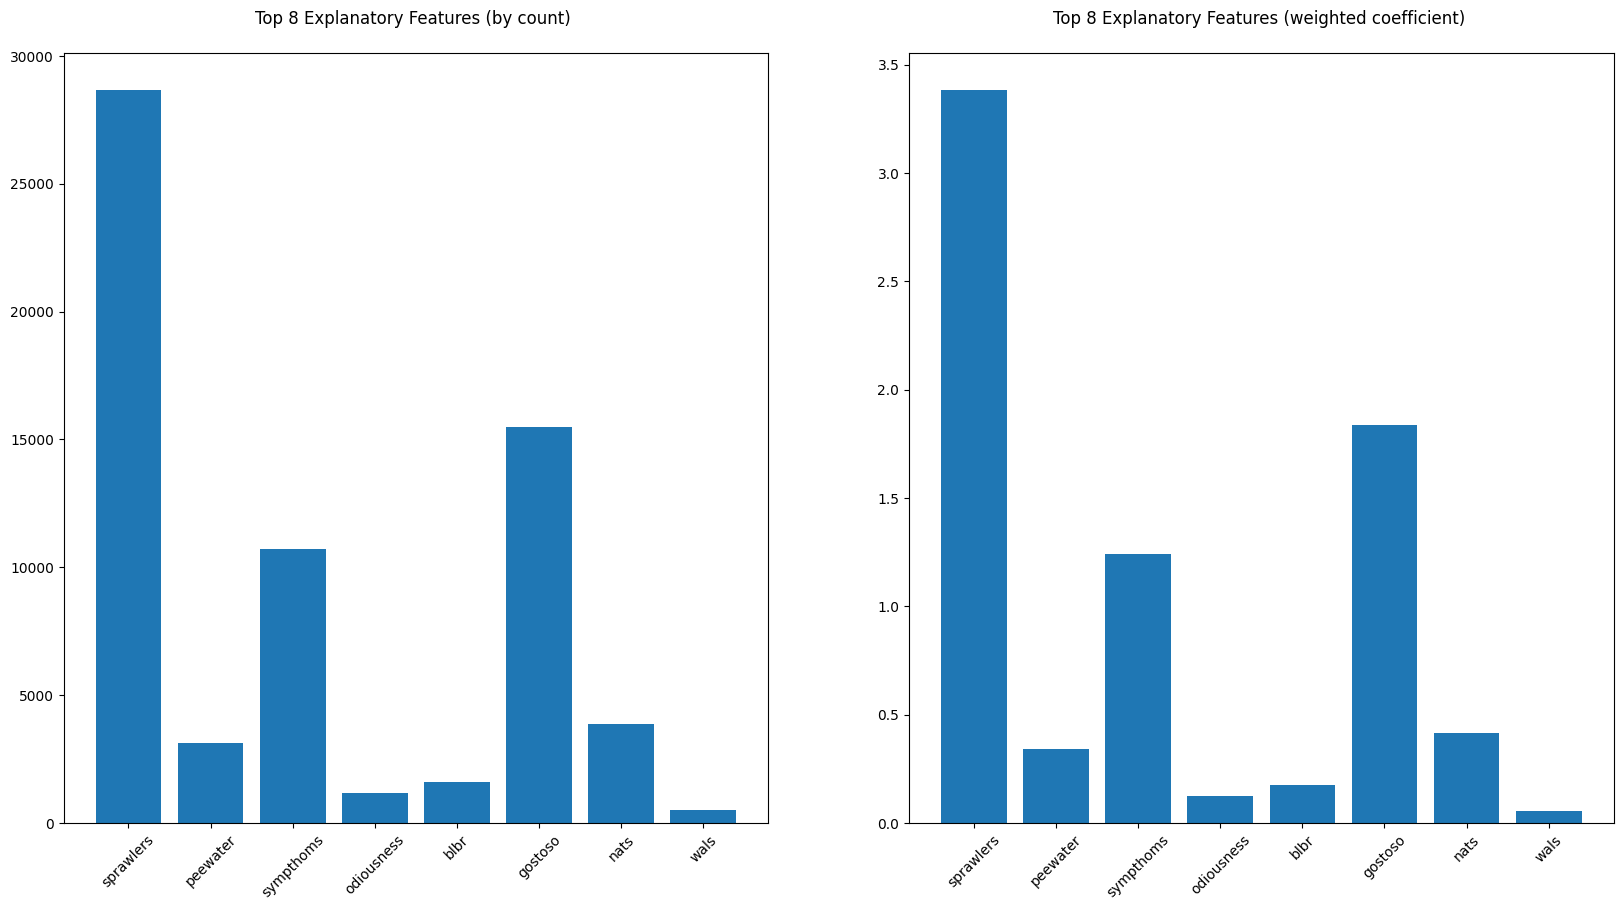

In [15]:
from cornac.visualization import Visualization
my_plots = Visualization()

# create plots across the dataset
filtered_df = my_plots.create_aggregate_feature_importance_plot(
    explanations, type="bar", top_k=8, save_plot=False)

## Experiment

In [ ]:
from cornac.datasets import amazon_toy
from cornac.data.reader import Reader
from cornac.eval_methods import RatioSplit
from cornac.data.sentiment import SentimentModality

from cornac.models import EFM
from cornac.explainer import Exp_EFM
from cornac.experiment import Experiment_Explainers

from cornac.metrics_explainer import (Metric_Exp_DIV as DIV, Metric_Exp_EnDCG as EnDCG)

rating = amazon_toy.load_feedback(fmt="UIRT", reader=Reader(min_user_freq=50))
sentiment_data = amazon_toy.load_sentiment(reader=Reader(min_user_freq=50))
rating = rating[:500]

md = SentimentModality(data=sentiment_data)

eval_method = RatioSplit(
    data=rating,
    group_by="user",
    chrono=True,
    sentiment=md,
    test_size=0.2,
    exclude_unknowns=True,
    verbose=True,
)

efm = EFM(max_iter=20)
efm_exp = Exp_EFM(rec_model=efm, dataset=eval_method.train_set)

# initialize the models and metrics
rec_exp_pairs = [(efm, efm_exp)]
exp_metrics = [DIV(), EnDCG()]

# initialize experiment
experiment = Experiment_Explainers(
    eval_method=eval_method,
    models=rec_exp_pairs,
    metrics=exp_metrics,
    distribution=False,
    eval_train=True,
)
experiment.run()

In [ ]:
from cornac.experiment import Experiment_Explainers
from cornac.models import EFM, MTER
from cornac.explainer import Exp_EFM, Exp_MTER

from cornac.datasets import amazon_toy
from cornac.data.reader import Reader
from cornac.eval_methods import StratifiedSplit
from cornac.data.sentiment import SentimentModality
from cornac.metrics_explainer import Metric_Exp_DIV

rating = amazon_toy.load_feedback(fmt="UIRT", reader=Reader(min_user_freq=50))
sentiment_data = amazon_toy.load_sentiment(reader=Reader(min_user_freq=50))

md = SentimentModality(data=sentiment_data)

eval_method = StratifiedSplit(
    data=rating,
    group_by="user",
    chrono=True,
    sentiment=md,
    test_size=0.2,
    exclude_unknowns=True,
    verbose=True,
)

# initialize recommenders and explainers
efm = EFM(max_iter=20)
efm_exp = Exp_EFM(rec_model=efm, dataset=eval_method.train_set)

mter = MTER(max_iter=20)
mter_exp = Exp_MTER(rec_model=mter, dataset=eval_method.train_set)

# fit the recommenders
efm.fit(eval_method.train_set)
mter.fit(eval_method.train_set)

# initialize metrics
div = Metric_Exp_DIV()

# initialize experiment
rec_exp_pairs = [(efm, efm_exp), (mter, mter_exp)]
exp_metrics = [div]

experiment = Experiment_Explainers(eval_method=eval_method, models=rec_exp_pairs, metrics=exp_metrics, distribution=False,  eval_train=True)
experiment.run()